In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('./XYmat_lang_desc_cleaned.csv')
df2 = pd.read_csv('./word_feature_mat.csv')

In [3]:
df1.head(5)

,name,reviews,desc_snippet,FPS,Gore,Action,Demons,Shooter,First-Person,Great Soundtrack,...,Finnish,Norwegian,Swedish,Greek,Bulgarian,Romanian,Unnamed: 412,Vietnamese,Slovakian,number of languages
0,DOOM,92,Now includes all three premium DLC packs (Unto...,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,10
1,PLAYERUNKNOWN'S BATTLEGROUNDS,49,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,1,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,17
2,BATTLETECH,71,Take command of your own mercenary outfit of '...,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
3,DayZ,61,The post-soviet country of Chernarus is struck...,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,9
4,EVE Online,74,EVE Online is a community-driven spaceship MMO...,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [4]:
df2.head(5)

,name,desc_snippet,wf1,wf2,wf3,wf4,wf5,wf6,wf7,wf8,...,wf91,wf92,wf93,wf94,wf95,wf96,wf97,wf98,wf99,wf100
0,DOOM,Now includes all three premium DLC packs (Unto...,0.006291,0.019894,-0.036758,-0.083445,0.005177,0.061250,-0.021474,0.017422,...,-0.022482,-0.033148,-0.068780,-0.001817,-0.017904,0.030351,0.004494,0.032382,-0.038966,-0.011268
1,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,0.065965,-0.040907,0.083006,-0.127466,0.047808,-0.001543,-0.050009,0.039216,...,-0.023967,0.092510,-0.061511,-0.053102,-0.076502,0.028666,-0.070288,0.085814,-0.036982,0.007031
2,BATTLETECH,Take command of your own mercenary outfit of '...,-0.031684,-0.044110,0.039126,-0.083009,0.019074,-0.035856,-0.076101,-0.022778,...,0.018407,0.000874,-0.036874,0.007654,-0.051571,0.053892,-0.045746,0.104181,-0.009850,0.006609
3,DayZ,The post-soviet country of Chernarus is struck...,-0.055274,-0.039872,0.011899,-0.009593,-0.051783,-0.071177,-0.109749,-0.064325,...,0.005817,0.016707,-0.070429,0.028132,-0.015154,0.082653,-0.020251,0.084262,0.054496,-0.026706
4,EVE Online,EVE Online is a community-driven spaceship MMO...,0.043309,0.011002,0.063850,-0.116439,0.026295,-0.004743,-0.111624,-0.012195,...,0.030270,0.049835,-0.096783,-0.020521,-0.073409,0.023094,-0.035156,0.090076,-0.001013,-0.026774


In [5]:
array1 = df1.to_numpy()
X1 = np.delete(array1, 2, 1)

In [6]:
print(X1)

[['DOOM' 92 1 ... 0 0 10]
 ["PLAYERUNKNOWN'S BATTLEGROUNDS" 49 1 ... 0 0 17]
 ['BATTLETECH' 71 0 ... 0 0 4]
 ...
 ['The Last Weekend' 57 0 ... 0 0 1]
 ['Zulu Response' 47 1 ... 0 0 2]
 ['Choice of Rebels: Uprising' 96 0 ... 0 0 6]]


In [7]:
array2 = df2.to_numpy()
X2 = np.delete(array2, 1, 1)

In [8]:
print(X2)

[['DOOM' 0.006291399244219065 0.019894296675920485 ...
  0.032381537929177286 -0.03896602783352136 -0.01126769632101059]
 ["PLAYERUNKNOWN'S BATTLEGROUNDS" 0.06596502251923084 -0.0409067090600729
  ... 0.08581372052431106 -0.03698160322383046 0.007031131908297539]
 ['BATTLETECH' -0.03168355114758015 -0.044109889492392536 ...
  0.10418071886524558 -0.009849852696061137 0.006608905643224717]
 ...
 ['Galactis' 0.029017702862620356 -0.02262181304395199 ...
  0.041712296288460494 0.010209517553448677 0.0016313848667778073]
 ['Alive' -0.02112476322799921 -0.025149831059388814 ...
  0.059446010022657 0.030122669786214824 -0.04876134330406785]
 ['Stories In Stone' -0.0131360721308738 0.01890635378658772 ...
  0.02485982086509466 0.04401859268546104 -0.0465050233528018]]


In [10]:
new_array = []
i = 0

while i < len(X1):
    for arr in X2:
        if X1[i][0] == arr[0]:
            new_array.append(np.append(X1[i][1:], arr[1:]))
            break
    i += 1
    #print(i)

print(len(X1), len(X2))

Xy = np.asarray(new_array)
print(Xy.shape)
for i in Xy:
    for j in i:
        if np.isnan(j) == True:
            print(True)

10277 24612
(10203, 514)


In [11]:
print(Xy)

[[92 1 1 ... 0.032381537929177286 -0.03896602783352136
  -0.01126769632101059]
 [49 1 0 ... 0.08581372052431106 -0.03698160322383046
  0.007031131908297539]
 [71 0 0 ... 0.10418071886524558 -0.009849852696061137
  0.006608905643224717]
 ...
 [57 0 0 ... 0.039271814282983535 0.03507877103984356 0.00484479907900095]
 [47 1 0 ... 0.08566247075796128 -0.05540984738618136
  -0.004844885074999183]
 [96 0 0 ... 0.0850942999124527 -0.006312704086303711
  -0.014720835583284497]]


In [12]:
X = Xy[:, 1:]
y = Xy[:, 0]


## Split train test data

In [13]:
num_train = len(Xy) // 10 * 7

Xtrain = X[:num_train]
Xtest = X[num_train:]
ytrain = y[:num_train]
ytest = y[num_train:]
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)
print(np.where(Xy=='nan'))

(7140, 513) (3063, 513) (7140,) (3063,)
(array([], dtype=int64), array([], dtype=int64))


## Test data with multiple linear regression

In [14]:
import scipy as sp
import scipy.sparse.linalg
import math

In [15]:
out = sp.sparse.linalg.lsqr(Xtrain,ytrain)
beta = out[0]
print(beta.shape)

(513,)


## Compute Baseline

In [16]:
yBaseline = np.ones(len(ytest)) * np.mean(ytrain)
errs = np.array(abs(ytest - yBaseline))
loss = np.sum(errs)
avgL = loss/len(ytest)
print("multiple variable loss="+"{:.2e}".format(avgL))

multiple variable loss=2.24e+01


In [17]:
## Compute loss with linear regression

In [18]:
print(Xtest)
yp = Xtest@beta
errs = np.array(abs(ytest - yp))
avgL = np.mean(errs)


print("multiple variable loss="+"{:.2e}".format(avgL))

arr = []
for i in range(len(ytest)):
    arr.append(abs(yp[i]-ytest[i]))
arr.sort(reverse = True)


[[0 0 1 ... -0.012236664863303305 -0.0187341008335352
  0.012150854244828223]
 [0 0 1 ... 0.029344024229794742 0.03323996104300022 -0.03156232042238116]
 [0 0 0 ... 0.00985959842801094 0.03081499636173248 0.009103235136717559]
 ...
 [0 0 1 ... 0.039271814282983535 0.03507877103984356 0.00484479907900095]
 [1 0 0 ... 0.08566247075796128 -0.05540984738618136
  -0.004844885074999183]
 [0 0 0 ... 0.0850942999124527 -0.006312704086303711
  -0.014720835583284497]]
multiple variable loss=2.03e+01


In [19]:
print(type(Xtest[-1][2]))

<class 'int'>


In [20]:
import matplotlib.pyplot as plt



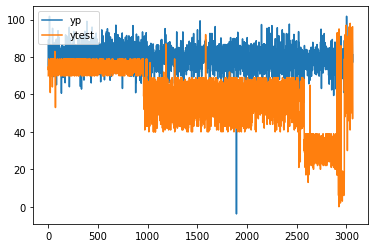

In [21]:


plt.plot(yp, label = "yp")
plt.plot(ytest, label = "ytest")
plt.legend(loc="upper left")
axes = plt.gca()
#axes.set_xlim([0,500])
#axes.set_ylim([0,150])
plt.show()

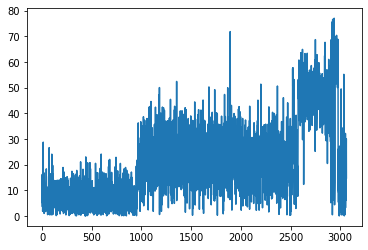

In [22]:
plt.plot(errs)

In [23]:
print(np.mean(errs))

20.338622799882195
